In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(train.shape)
print(train.head())
print(train.describe(include='all'))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [ ]:
print(test.shape)
print(test.head())
print(test.describe(include='all'))

(418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN      

In [ ]:
categorical = ['Pclass', 'Sex']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categories = encoder.fit_transform(train[categorical])
df_encoded = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical))
df = pd.concat([train, df_encoded], axis=1)
df.drop(columns=categorical, inplace=True)

test_encoded_categories = encoder.fit_transform(test[categorical])
test_encoded = pd.DataFrame(test_encoded_categories, columns=encoder.get_feature_names_out(categorical))
test = pd.concat([test, test_encoded], axis=1)
test.drop(columns=categorical, inplace=True)

In [ ]:
print(f'null:\n{df.isnull().sum()}')
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[["Age"]])
print(f'\nAfter fill age with median:\n{df.isnull().sum()}')

null:
PassengerId      0
Survived         0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_2         0
Pclass_3         0
Sex_male         0
dtype: int64

After fill age with median:
PassengerId      0
Survived         0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_2         0
Pclass_3         0
Sex_male         0
dtype: int64


In [ ]:
print(f'null:\n{test.isnull().sum()}')
imputer = SimpleImputer(strategy='median')
test['Age'] = imputer.fit_transform(test[["Age"]])
print(f'\nAfter fill age with median:\n{test.isnull().sum()}')

null:
PassengerId      0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pclass_2         0
Pclass_3         0
Sex_male         0
dtype: int64

After fill age with median:
PassengerId      0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pclass_2         0
Pclass_3         0
Sex_male         0
dtype: int64


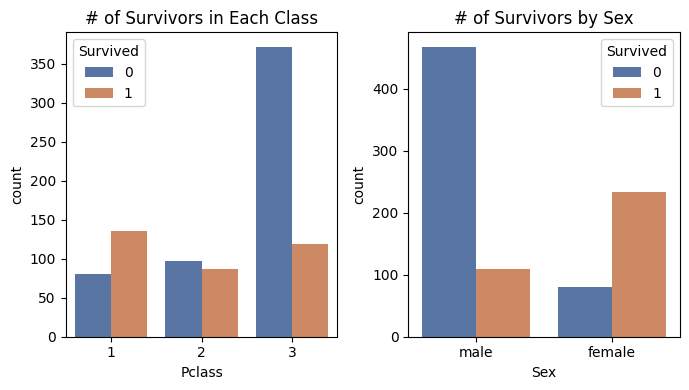

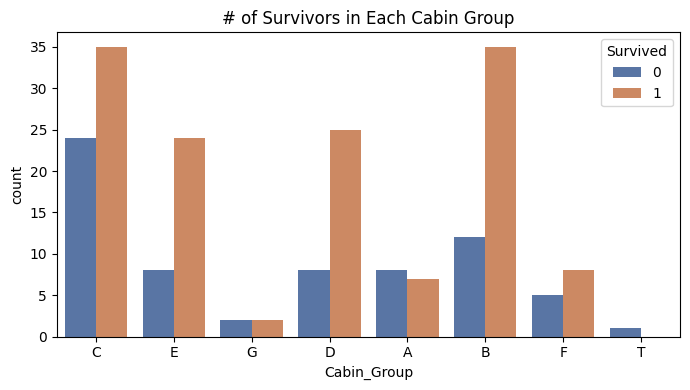

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7,4))

# Pclass countplot visualization
sns.countplot(x=train['Pclass'], hue=train['Survived'], palette='deep', ax=axes[0])
axes[0].set_title("# of Survivors in Each Class")

# Gender countplot visualization
sns.countplot(x=train['Sex'], hue=train['Survived'], palette='deep', ax=axes[1])
axes[1].set_title("# of Survivors by Sex")

plt.tight_layout()
plt.show()
cabin_df = df.copy()
cabin_df['Cabin_Group'] = df['Cabin'].str[0]

plt.figure(figsize=(7,4))
sns.countplot(x=cabin_df['Cabin_Group'], hue=cabin_df['Survived'], palette='deep')
plt.title("# of Survivors in Each Cabin Group")
plt.tight_layout()
plt.show()

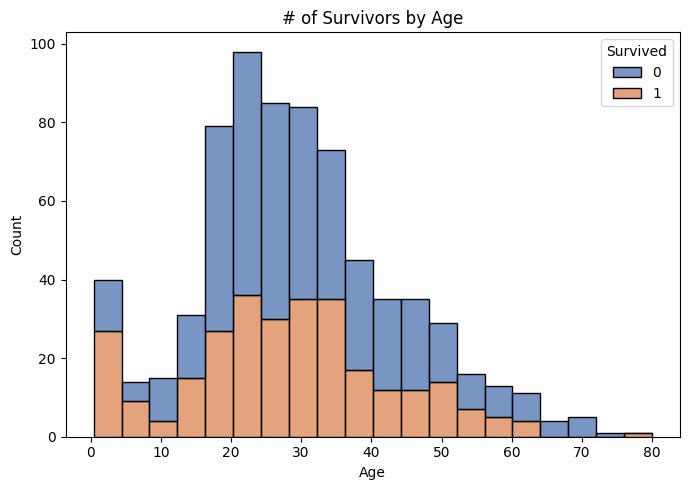

In [ ]:
#before fill null with median
plt.figure(figsize=(7,5))
sns.histplot(x=train['Age'], hue=train['Survived'], multiple='stack', palette='deep')
plt.title("# of Survivors by Age")
plt.tight_layout()
plt.show()

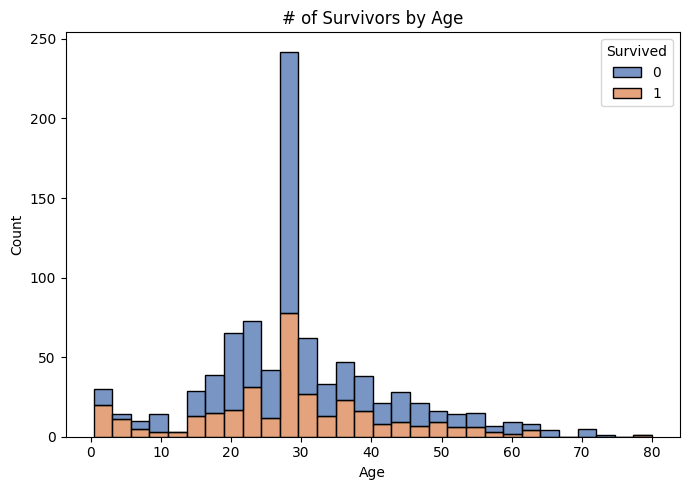

In [ ]:
#After fill null with median
plt.figure(figsize=(7,5))
sns.histplot(x=df['Age'], hue=df['Survived'], multiple='stack', palette='deep')
plt.title("# of Survivors by Age")
plt.tight_layout()
plt.show()

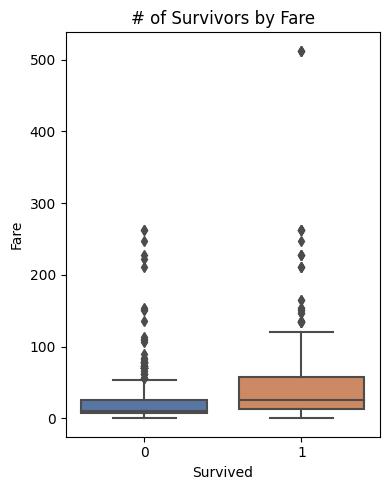

In [ ]:
#The amount of survivors by age has a slight right skew, meaning most of the survivors were of a younger age
plt.figure(figsize=(4,5))
sns.boxplot(x=train['Survived'], y=train['Fare'], palette='deep')
plt.title("# of Survivors by Fare")
plt.tight_layout()
plt.show()